# Vision Transformer (ViT)
This notebook replicates the Vision Transformer (ViT) model paper with PyTorch for image classification tasks
> URL: https://arxiv.org/abs/2010.11929

In [10]:
import os
from pathlib import Path

import sys
sys.path.append("../")
from src.utils import get_device, plot_loss_curves
from going_modular import data_setup, engine

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchinfo import summary

from tqdm.notebook import tqdm

print("PyTorch version: ",torch.__version__)
print("Torchvision version: ",torchvision.__version__)

PyTorch version:  2.0.0
Torchvision version:  0.15.1


Hyperparameters

In [14]:
BATCH_SIZE = 32 # The paper uses 4096 which is too big for a normal computer's hardware
NUM_WORKERS = 0 # MPS cannot work with more than 0
EPOCHS = 3
LR = 0.001
SEED = 42
IMG_SIZE = 224 #dimensions used by the ViT paper

Set device

In [11]:
device = get_device()
device

'mps'

Get data

In [12]:
data_path = Path("data/")
train_dir = data_path / "pizza_steak_sushi/train"
test_dir = data_path / "pizza_steak_sushi/test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### Create datasets and dataloaders

In [17]:
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor()
])

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir = train_dir,
    test_dir = test_dir,
    transform = manual_transforms,
    batch_size = BATCH_SIZE
)

print(f"Number of training batches: {len(train_dataloader)}")
print(f"Number of test batches: {len(test_dataloader)}")
print(f"Class names of interest: {class_names}")

Number of training batches: 8
Number of test batches: 3
Class names of interest: ['pizza', 'steak', 'sushi']


### Visualizing our images

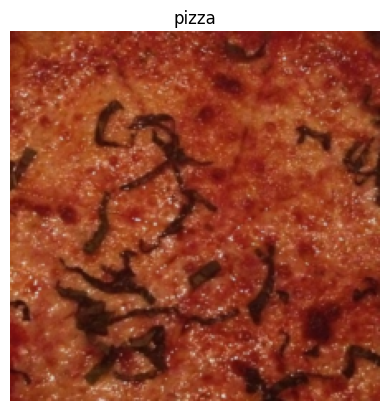

In [21]:
image_batch, label_batch = next(iter(train_dataloader))
image, label = image_batch[0], label_batch[0]
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)
plt.show()